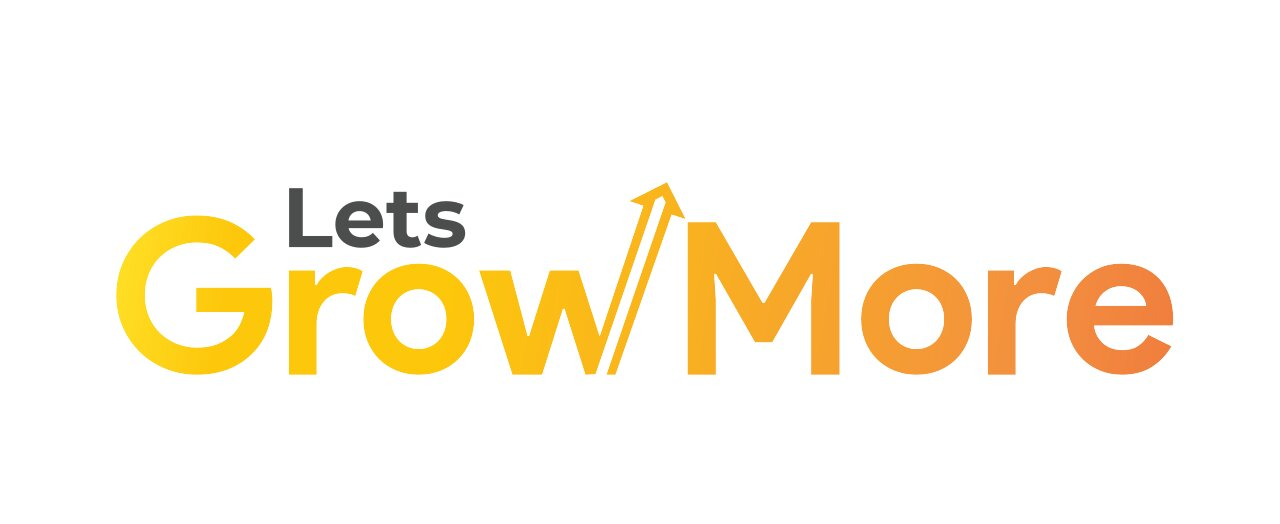

## Author Name : Dinesh J, Data Science Intern

## Task Level : Task 1 - Intermediate Level

## Task Name : Exploratory Data Analysis on Terrorism Dataset

#### Import the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset

In [4]:
terr_data = pd.read_csv('globalterrorismdb.csv',encoding = 'mbcs')

#### Print the top 5 rows of the dataset

In [5]:
terr_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Print the detailed information about the dataset

In [6]:
terr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### Print the statistical information about the dataset

In [34]:
terr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


#### Checking the null information in the dataset

In [7]:
terr_data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### Showing the correlation about various columns of the dataset

In [11]:
terr_data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


### Data Analysis on various measures

In [36]:
terr_data.iyear.value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [37]:
terr_data.imonth.value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

In [38]:
terr_data.iday.value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: iday, dtype: int64

#### Country level attacks

In [40]:
terr_data.country_txt.value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
International            1
New Hebrides             1
Andorra                  1
North Korea              1
Wallis and Futuna        1
Name: country_txt, Length: 205, dtype: int64

#### Nationality level attacks

In [41]:
terr_data.natlty1_txt.value_counts()

Iraq                                  24113
Pakistan                              13900
India                                 12098
Afghanistan                           10931
Colombia                               7922
                                      ...  
Commonwealth of Independent States        1
People's Republic of the Congo            1
Greenland                                 1
Tuvalu                                    1
Saba (Netherlands Antilles)               1
Name: natlty1_txt, Length: 215, dtype: int64

In [44]:
terr_data.natlty2_txt.value_counts()

Iraq                 1786
Afghanistan          1438
Pakistan              746
India                 661
Somalia               632
                     ... 
Panama                  1
Equatorial Guinea       1
Lesotho                 1
Maldives                1
Namibia                 1
Name: natlty2_txt, Length: 158, dtype: int64

In [45]:
terr_data.natlty3_txt.value_counts()

Iraq           139
Afghanistan    128
India           57
Pakistan        56
Philippines     56
              ... 
Kuwait           1
Albania          1
Gabon            1
Guyana           1
Yugoslavia       1
Name: natlty3_txt, Length: 110, dtype: int64

#### Regionwise counts

In [57]:
terr_data.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

#### Statelevel count

In [55]:
terr_data.provstate.value_counts()

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
                      ... 
Siah                     1
Kalbajar                 1
Acapulco                 1
Malaita (Province)       1
Panamá                   1
Name: provstate, Length: 2855, dtype: int64

#### Sum of killings

In [48]:
terr_data.nkill.sum()

411868.0

#### Sum of Wounded people

In [51]:
terr_data.nwound.sum()

523869.0

#### Total count of wounded and killing peoples

In [60]:
terr_data['total'] = terr_data['nkill'] + terr_data['nwound']
terr_data.total.sum()

872892.0

#### Total count according to region

In [62]:
terr_data1 = terr_data.groupby('region_txt')['total'].sum()
terr_data1_df = pd.DataFrame(terr_data1)
terr_data1_df.reset_index()

,region_txt,total
0,Australasia & Oceania,409.0
1,Central America & Caribbean,34530.0
2,Central Asia,2969.0
3,East Asia,10003.0
4,Eastern Europe,18239.0
5,Middle East & North Africa,329807.0
6,North America,26398.0
7,South America,43562.0
8,South Asia,234366.0
9,Southeast Asia,40841.0


#### Total count according to region and Year

In [65]:
terr_data2 = terr_data.groupby(['region_txt','iyear'])['total'].count().head()
terr_data2

region_txt             iyear
Australasia & Oceania  1970     1
                       1971     1
                       1972     8
                       1973     1
                       1974     1
Name: total, dtype: int64

#### Total count according to region and Year representation

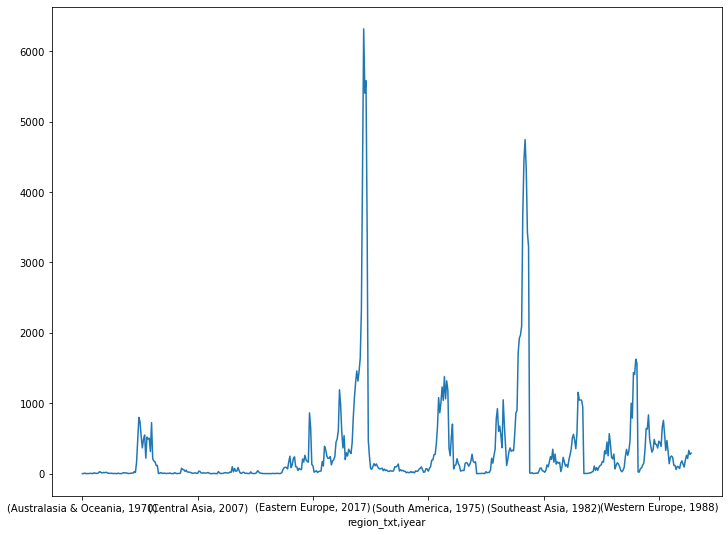

In [69]:
plt.figure(figsize=(12,9))
terr_data2 = terr_data.groupby(['region_txt','iyear']).count()['total'].plot()
plt.show()

In [8]:
print('Country with the highest number of Terrorist Attacks:',terr_data['country_txt'].value_counts().index[0])

Country with the highest number of Terrorist Attacks: Iraq


In [10]:
print('Regions with the highest number of  Terrorist Attacks:',terr_data['region_txt'].value_counts().index[0])

Regions with the highest number of  Terrorist Attacks: Middle East & North Africa


#### Death Injuries

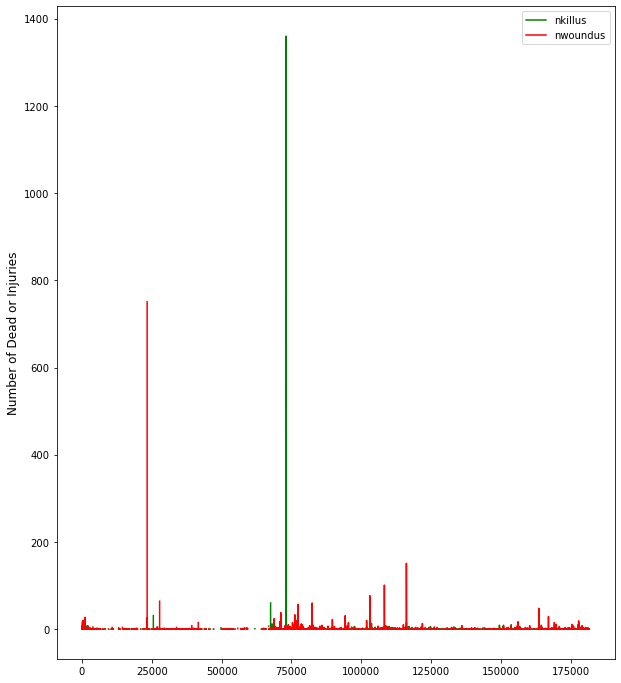

In [29]:
plt.figure(figsize=(10,12))
terr_data.nkillus.plot(kind='line',color ='green')
terr_data.nwoundus.plot(kind='line',color='red')
plt.ylabel('Number of Dead or Injuries', fontsize=12)
plt.legend()
plt.show()

#### Injuries at all time

<Figure size 360x432 with 0 Axes>

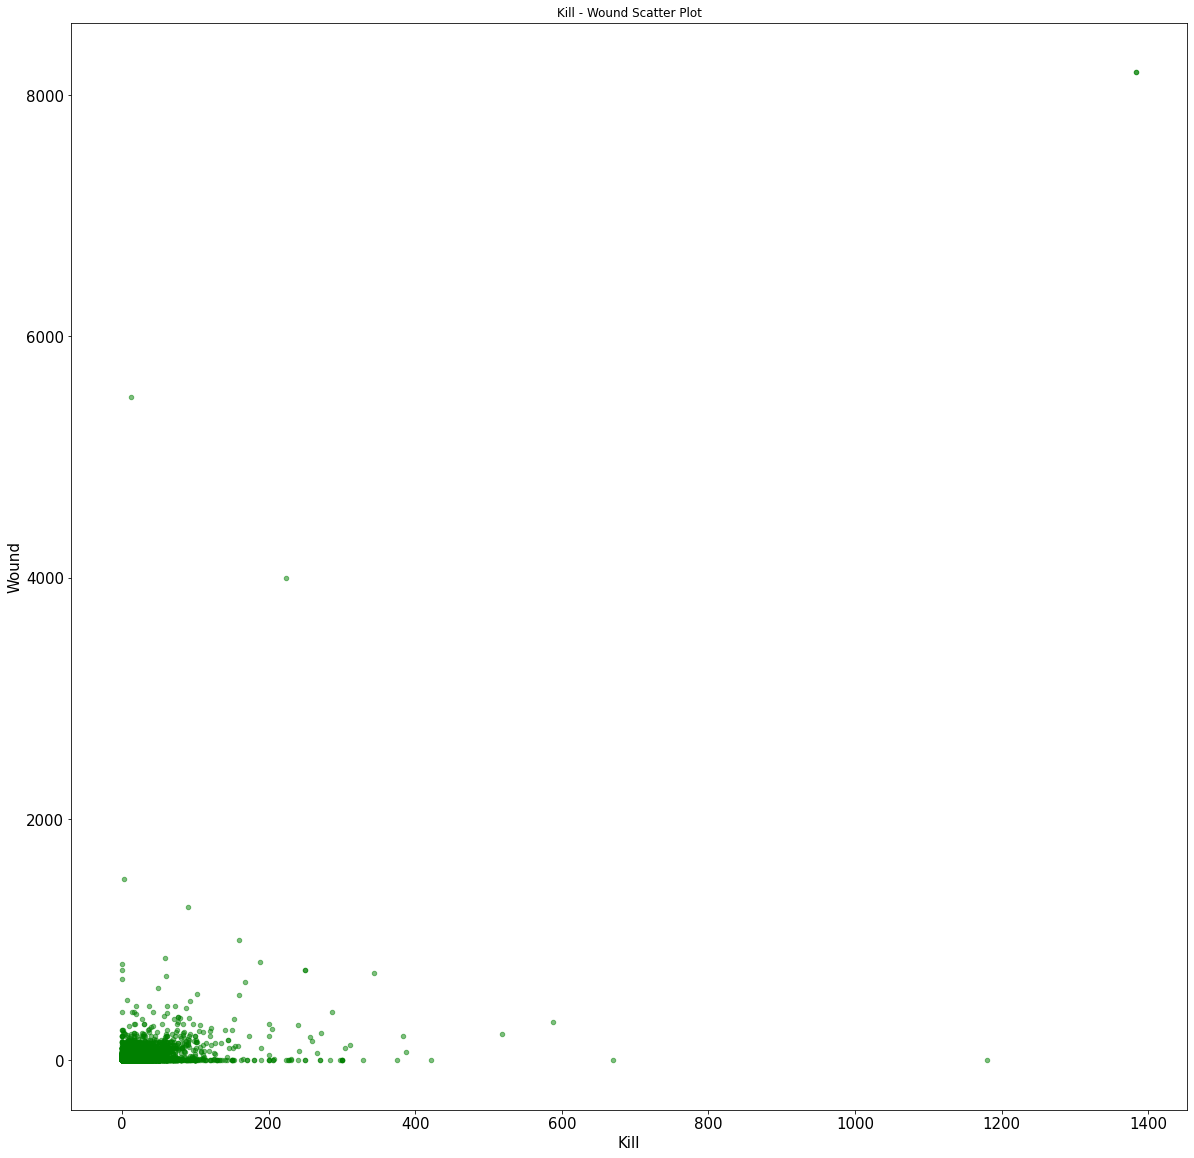

In [33]:
plt.figure(figsize=(5,6))
terr_data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'green', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

#### Weapon Type

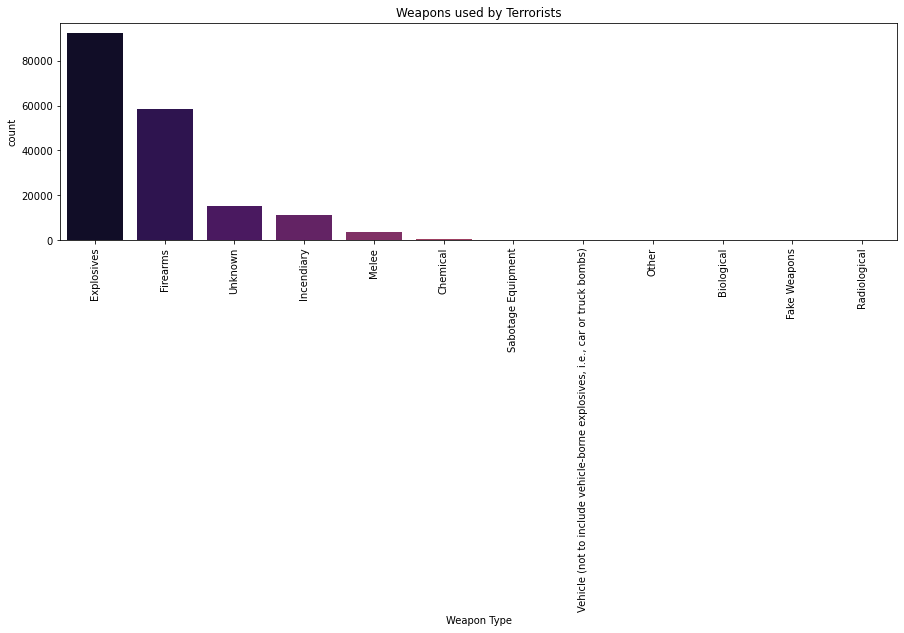

In [72]:
plt.subplots(figsize=(15,4))
sns.countplot('weaptype1_txt',data=terr_data,palette='inferno',order=terr_data['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

#### Region Representation

<AxesSubplot:>

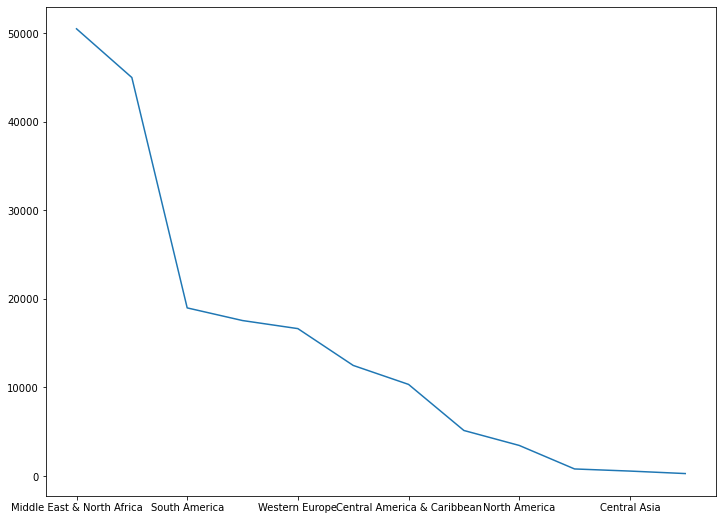

In [74]:
plt.figure(figsize=(12,9))
terr_data.region_txt.value_counts().plot()

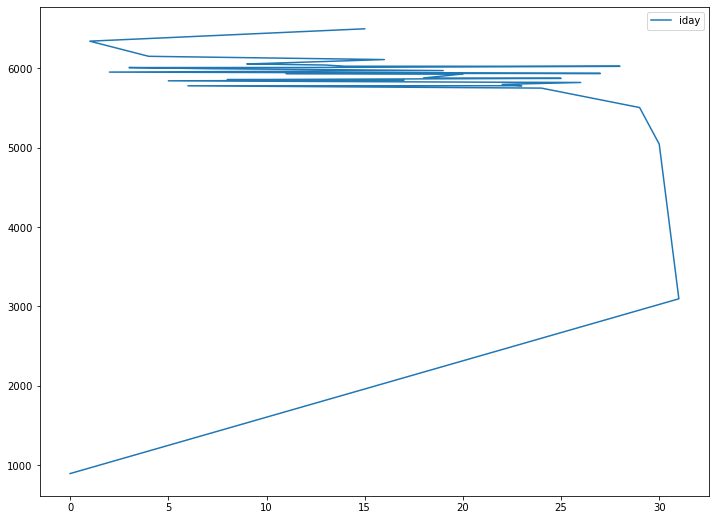

In [76]:
plt.figure(figsize=(12,9))
terr_data.iday.value_counts().plot()
plt.legend()

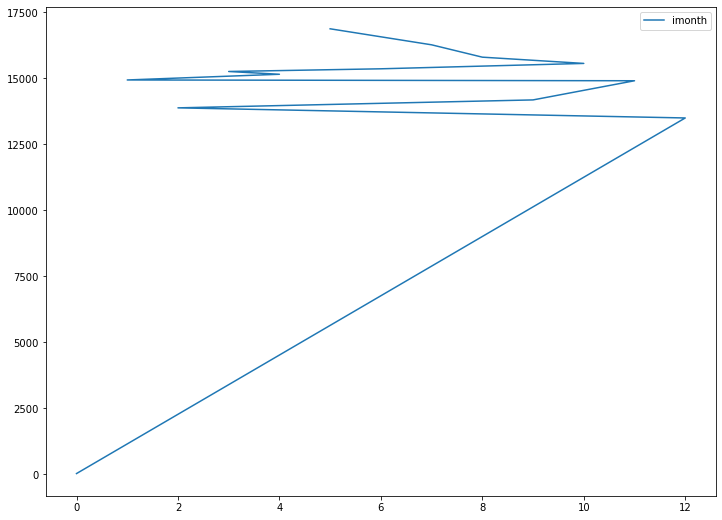

In [78]:
plt.figure(figsize=(12,9))
terr_data.imonth.value_counts().plot()
plt.legend()

#### Killed Vs Year

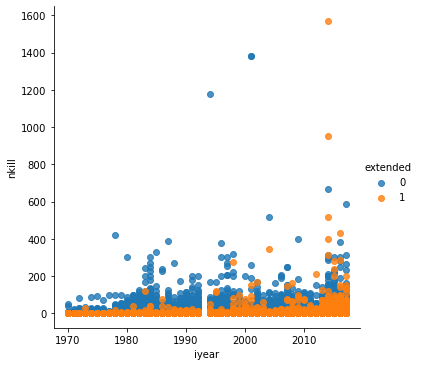

In [94]:
sns.lmplot(x='iyear',y='nkill',data=terr_data,fit_reg=False,hue='extended',legend=True)

#### Top countries Affected

C:\Users\dinesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


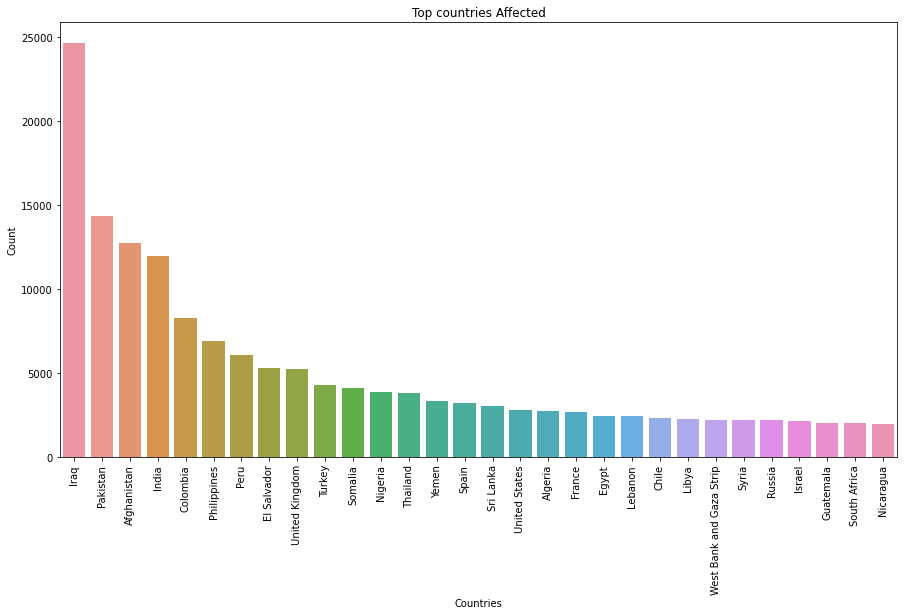

In [93]:
plt.subplots(figsize=(15,8))
sns.barplot(terr_data['country_txt'].value_counts()[:30].index,terr_data['country_txt'].value_counts()[:30].values)
plt.title('Top countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

#### Number Of Terrorist Activities Each Year

C:\Users\dinesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


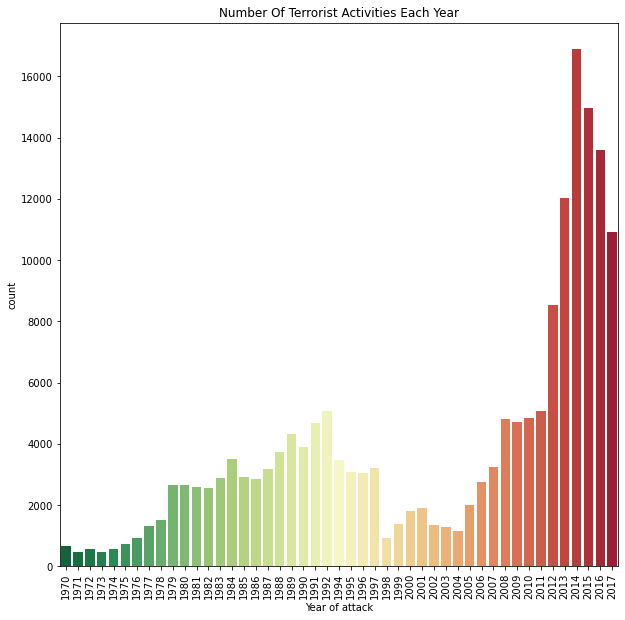

In [92]:
plt.subplots(figsize=(10,10))
sns.countplot('iyear',data=terr_data,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### Number Of Terrorist Activities By Region

C:\Users\dinesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


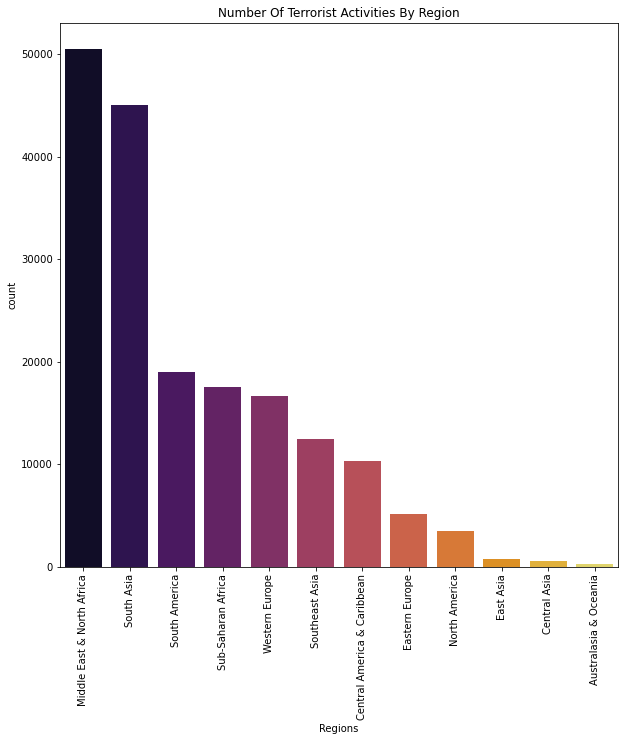

In [90]:
plt.subplots(figsize=(10,10))
sns.countplot('region_txt',data=terr_data,palette='inferno',order=terr_data['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

#### Terrorist Activities by region in each year

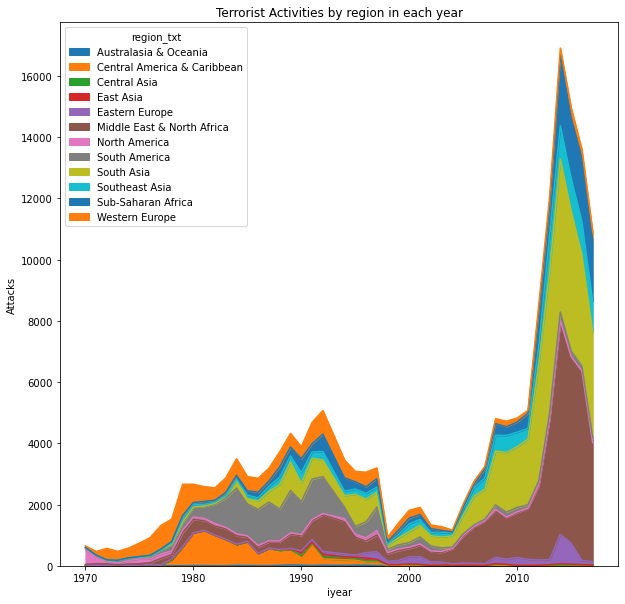

In [89]:
df_region=pd.crosstab(terr_data.iyear,terr_data.region_txt).plot(kind='area',figsize=(10,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()